In [1]:
# http://learn.astropy.org/FITS-images.html

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob
import astropy
from astropy.io import fits
import pathlib


*Code to do the pre-processing* 

In [3]:
#ON IAP computers, set the path to this:
#data_dir = "/poubelles/broque1NS/tmp/hjmcc/tpnocturne-2019"

data_dir = "/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120/"
output_dir = "/Users/hjmcc/Dropbox/teaching/m2/processed/"

*Process the bias frames* 

In [4]:
image_list = glob.glob(data_dir+'/20210301/flats-biais-dark/Bias*fits')
print (np.size(image_list))

5


In [5]:
image_list

['/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/flats-biais-dark/Bias-0001.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/flats-biais-dark/Bias-0002.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/flats-biais-dark/Bias-0003.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/flats-biais-dark/Bias-0004.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/flats-biais-dark/Bias-0005.fits']

In [6]:
images = np.stack([fits.getdata(bias).astype(np.float32) for bias in image_list], axis=2)
final_bias = np.median(images, axis=2)

In [7]:
outfile = output_dir+'final_bias.fits'
hdu = fits.PrimaryHDU(final_bias)
hdu.writeto(outfile, overwrite=True)

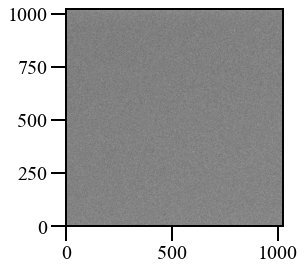

In [8]:
plt.imshow(final_bias, cmap='gray')


Make the flat-field

In [9]:
flat_list = glob.glob(data_dir+'./20210301/flats-biais-dark/Flat*R.fits')

In [10]:
images = np.stack([fits.getdata(flat).astype(np.float32) - final_bias for flat in flat_list], axis=2)
flat_in = np.median(images, axis=2)

In [11]:
final_flat = flat_in/np.mean(flat_in) 

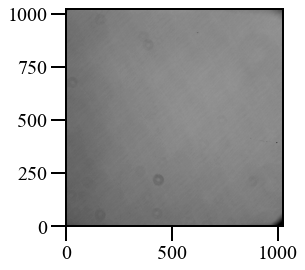

In [12]:
plt.imshow(final_flat, cmap='gray', vmin=0.9,vmax=1.1)


In [13]:
outfile = output_dir+'final_flatR.fits'
hdu = fits.PrimaryHDU(final_flat)
hdu.writeto(outfile, overwrite=True)

In [14]:
image_list = glob.glob(data_dir+'/20210301/seconde-moitié-de-la-nuit/M*R.fits')
np.size(image_list)

10

Now process all images with this master flat and master bias. 

In [15]:
image_list

['/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M92_-0002R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M63_-0004R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M63_-0002R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M92_-0004R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M63_-0005R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M92_-0003R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M92_-0001R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DATA/T120//20210301/seconde-moitié-de-la-nuit/M92_-0005R.fits',
 '/Users/hjmcc/Dropbox/teaching/m2/ohp/202103OHP1_M2/DAT

In [16]:
for image in image_list:
#    print(fits.getdata(image).shape)
    processed = (fits.getdata(image)-final_bias)/final_flat
    filename,file_extension=os.path.splitext(image)
    outfile=output_dir+os.path.basename(filename)+'_pr.fits'
    hdu = fits.PrimaryHDU(processed)
    hdu.writeto(outfile, overwrite=True)
    print(outfile)


/Users/hjmcc/Dropbox/teaching/m2/processed/M92_-0002R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M63_-0004R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M63_-0002R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M92_-0004R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M63_-0005R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M92_-0003R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M92_-0001R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M92_-0005R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M63_-0003R_pr.fits
/Users/hjmcc/Dropbox/teaching/m2/processed/M63_-0001R_pr.fits
